# Tremor Models using Stat Features
# REPLACE DESCRIPTION!
This notebook covers all the process of definition preprocessing, training and evaluation for 3 tremor inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have tremor (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle

import pandas as pd

from src.settings import ROOT_DIR
from src.model.standard_models_builder import build_models_modules
from src.evaluation.model_metrics_report import print_sklearn_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'posture-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'posture-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

12410

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

## Models
Define and train the models using GridSearch

In [5]:
svm, knn, gboost = build_models_modules(X_train, y_train)

Started Grid Search - Model: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters SVM: {'C': 1, 'kernel': 'rbf'}
Finished Grid Search - Model: SVM
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 11, 'weights': 'distance'}
Finished Grid Search - Model: KNN
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 64, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


## Train Metrics

In [5]:
results_path = ROOT_DIR / 'results' / 'models' / 'posture-features'
with open(results_path / 'model.svm.pkl', 'rb') as file:
    svm = pickle.load(file)

with open(results_path / 'model.knn.pkl', 'rb') as file:
    knn = pickle.load(file)

with open(results_path / 'model.gboost.pkl', 'rb') as file:
    gboost = pickle.load(file)

Accuracy: 0.7534246575342466
0.0
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      9350
           1       0.00      0.00      0.00      3060

    accuracy                           0.75     12410
   macro avg       0.38      0.50      0.43     12410
weighted avg       0.57      0.75      0.65     12410

AUC-ROC: 0.5
AUC-PR: 0.6232876712328768


C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

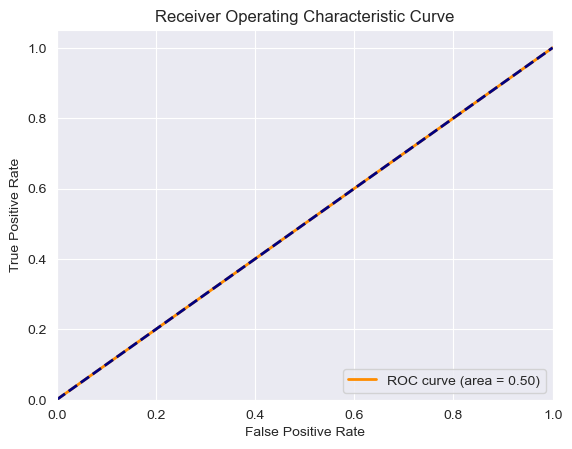

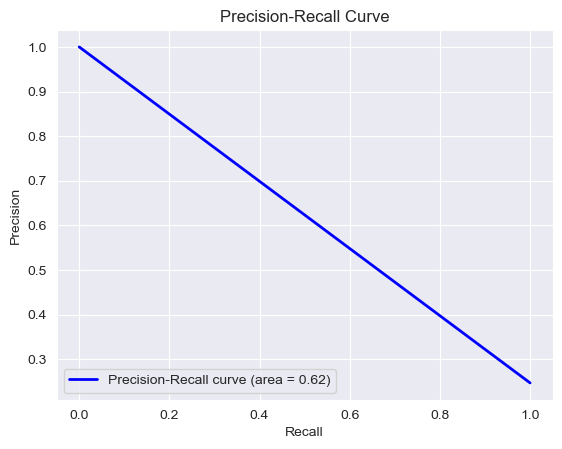

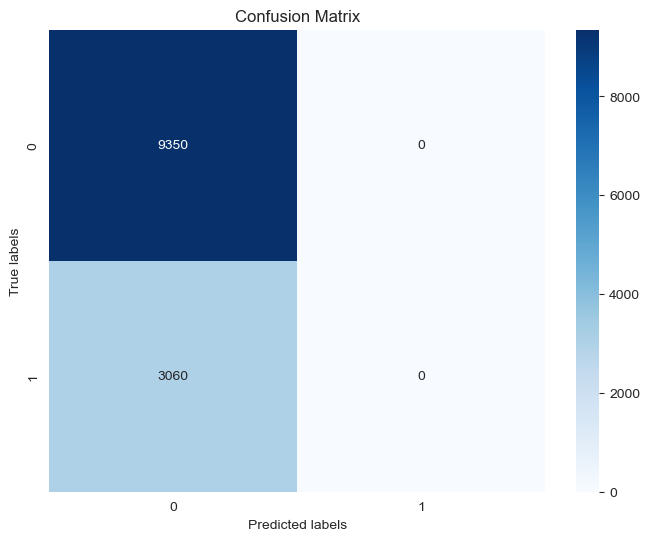

In [6]:
print_sklearn_model_metrics(svm, X_train, y_train.to_numpy())

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9350
           1       1.00      1.00      1.00      3060

    accuracy                           1.00     12410
   macro avg       1.00      1.00      1.00     12410
weighted avg       1.00      1.00      1.00     12410

AUC-ROC: 1.0
AUC-PR: 1.0


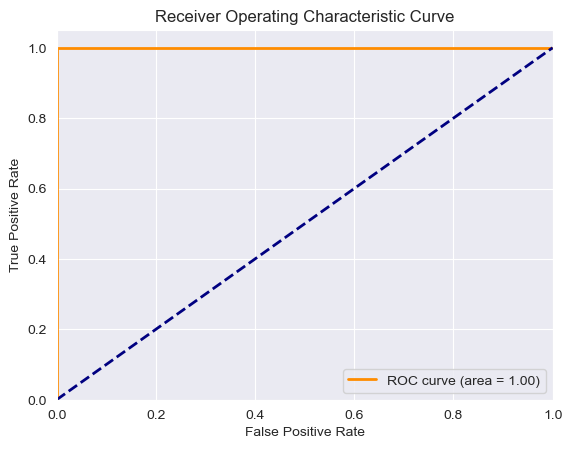

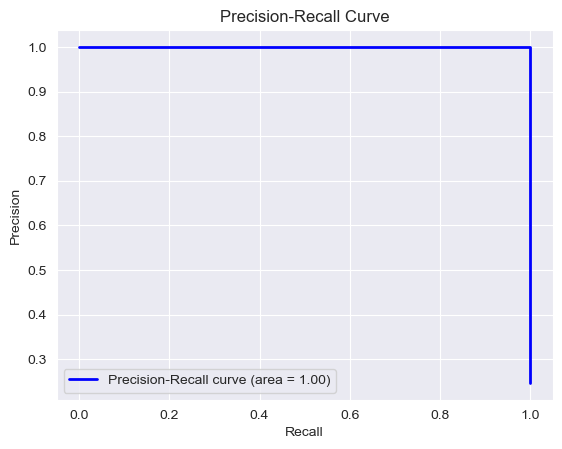

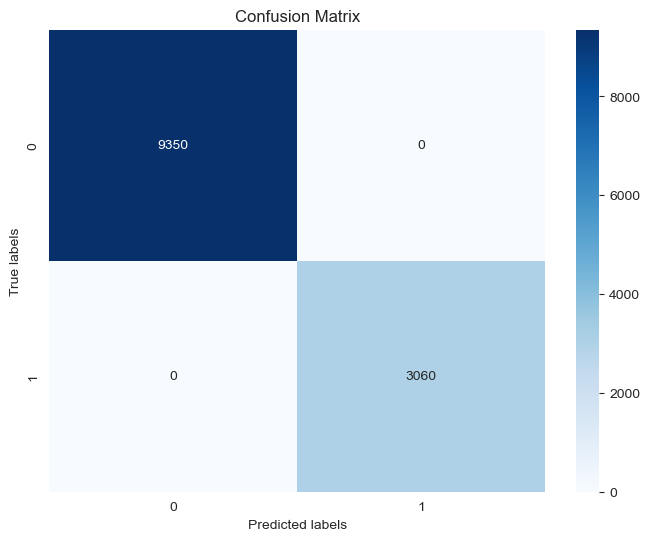

In [7]:
print_sklearn_model_metrics(knn, X_train, y_train)

Accuracy: 0.7833199033037873
0.23601710911928508
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      9350
           1       0.70      0.21      0.32      3060

    accuracy                           0.78     12410
   macro avg       0.75      0.59      0.60     12410
weighted avg       0.77      0.78      0.74     12410

AUC-ROC: 0.5900802139037432
AUC-PR: 0.5542142677554023


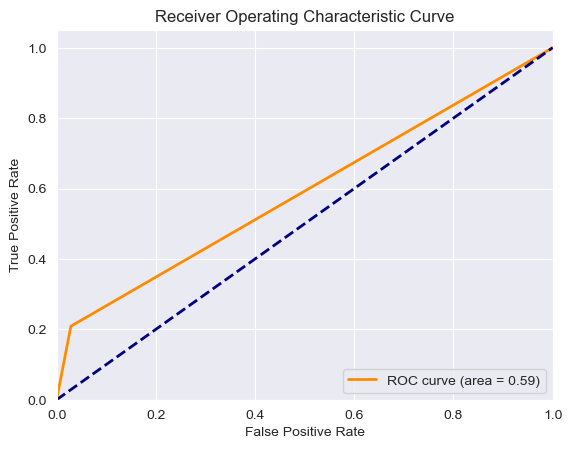

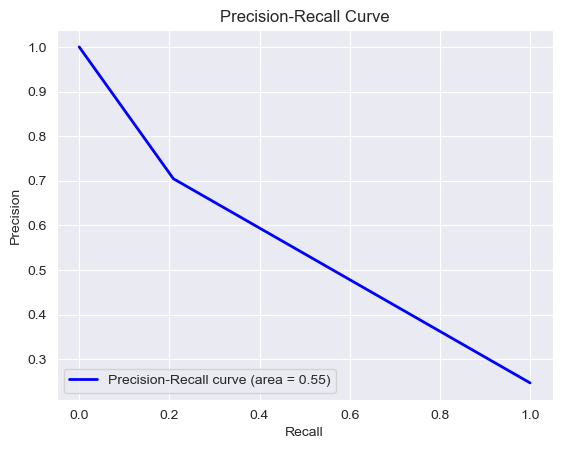

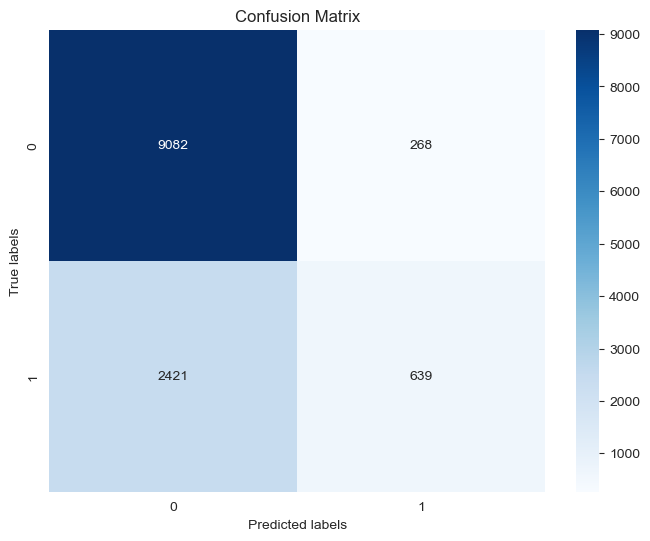

In [8]:
print_sklearn_model_metrics(gboost, X_train, y_train)

## Val Metrics

Accuracy: 0.7389202256244963
0.0
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1834
           1       0.00      0.00      0.00       648

    accuracy                           0.74      2482
   macro avg       0.37      0.50      0.42      2482
weighted avg       0.55      0.74      0.63      2482

AUC-ROC: 0.5
AUC-PR: 0.6305398871877518


C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

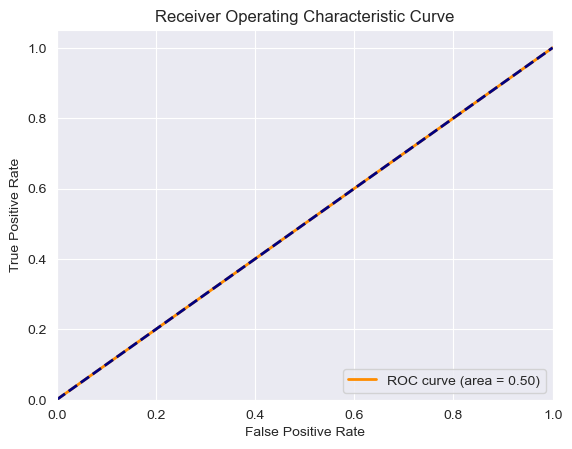

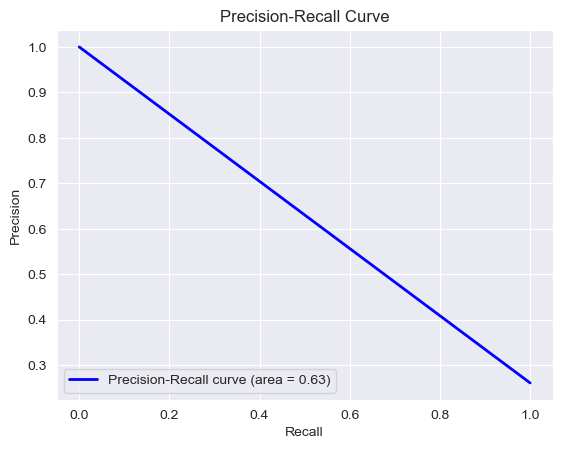

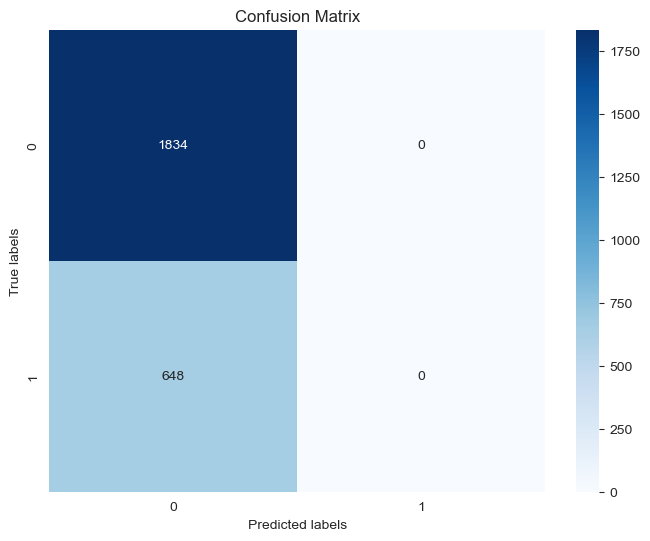

In [9]:
print_sklearn_model_metrics(svm, X_val, y_val)

Accuracy: 0.7634971796937954
0.3063956361406619
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1834
           1       0.57      0.37      0.45       648

    accuracy                           0.76      2482
   macro avg       0.69      0.64      0.65      2482
weighted avg       0.74      0.76      0.74      2482

AUC-ROC: 0.6353867953740727
AUC-PR: 0.552983644968749


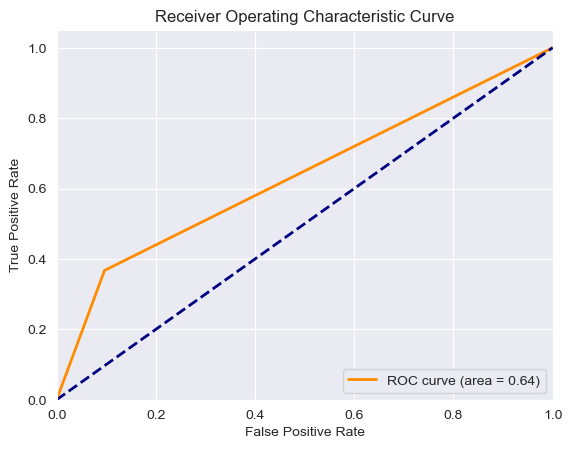

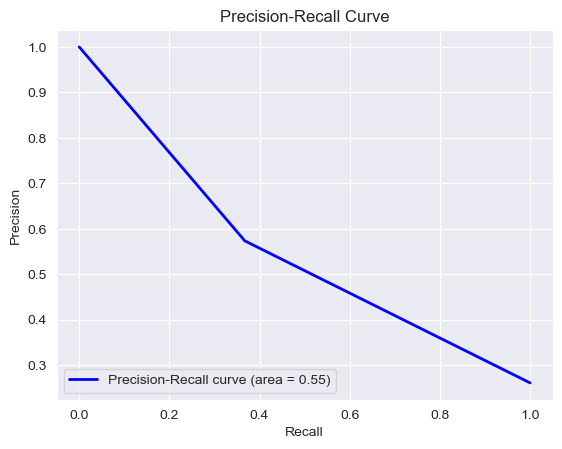

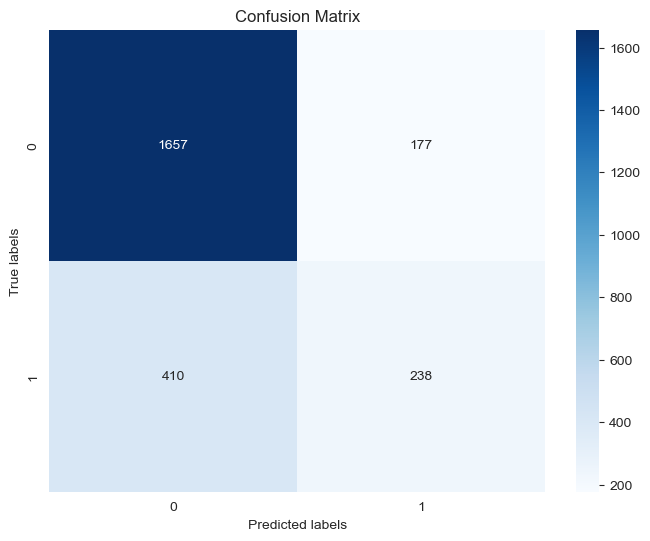

In [10]:
print_sklearn_model_metrics(knn, X_val, y_val)

Accuracy: 0.7643029814665592
0.20765188350277497
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1834
           1       0.67      0.19      0.30       648

    accuracy                           0.76      2482
   macro avg       0.72      0.58      0.58      2482
weighted avg       0.74      0.76      0.71      2482

AUC-ROC: 0.5800466497031382
AUC-PR: 0.5357126869012445


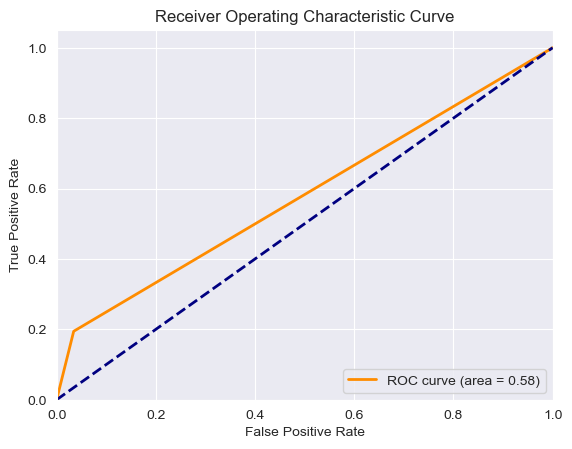

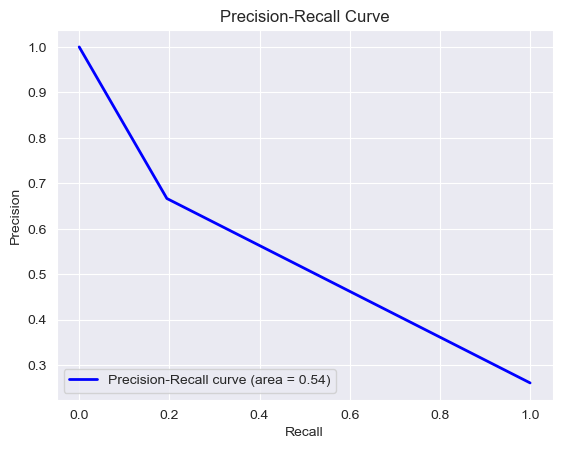

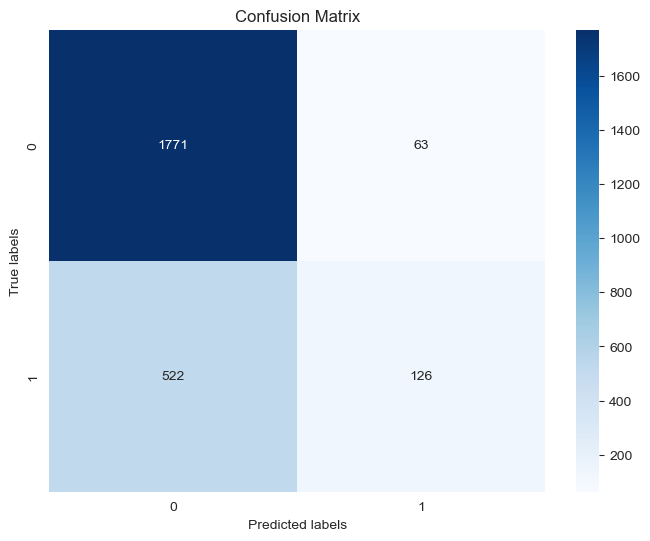

In [11]:
print_sklearn_model_metrics(gboost, X_val, y_val)

## Save models

In [20]:
save_path = str(ROOT_DIR) + '/results/models/posture-features/'

os.makedirs(save_path, exist_ok=True)

with open(save_path + 'model.svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
    file.close()
    
with open(save_path + 'model.knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()
    
with open(save_path + 'model.gboost.pkl', 'wb') as file:
    pickle.dump(gboost, file)
    file.close()
    